In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_2014 = pd.read_csv("2014_year_Q4_CR_data.csv")
df_2015 = pd.read_csv("2015_year_Q4_CR_data.csv")
df_2016 = pd.read_csv("2016_year_Q4_CR_data.csv")

In [3]:
# Add Year
df_2014["Year"] = 2014
df_2015["Year"] = 2015
df_2016["Year"] = 2016

company_ids = range(1, df_2014.shape[0] + 1)

df_2014["Company_ID"] = company_ids
df_2015["Company_ID"] = company_ids
df_2016["Company_ID"] = company_ids

df = pd.concat([df_2014, df_2015, df_2016], ignore_index=True)

df.shape

(2703, 30)

In [4]:
df.head()

,Assets - Total,Cash,Debt in Current Liabilities - Total,Long-Term Debt - Total,Earnings Before Interest,Gross Profit (Loss),Liabilities - Total,Retained Earnings,Total debt/total asset,total asset/total libiilities,...,Comprehensive Income - Parent,Employees,Inventories - Total,Earnings Per Share from Operations,Revenue - Total,Operating Activities - Net Cash Flow,Financing Activities - Net Cash Flow,Net Cash Flow,Year,Company_ID
0,43771.000,994.000,1708.00,16196.000,6585.000,13139.000,41750.000,-13121.000,0.370017,1.048407,...,355.000,113.300,1004.000,5.37,42650.000,3080.000,-315.000,2765.000,2014,1
1,14313.532,7.604,530.97,3031.215,1228.600,1228.600,9794.430,1857.924,0.211773,1.461395,...,407.507,6.366,255.986,3.54,3491.632,1099.627,-178.881,920.746,2014,2
2,41275.000,4063.000,4437.00,3408.000,4475.000,12088.000,19636.000,17821.000,0.082568,2.102007,...,-770.000,77.000,2643.000,1.57,20247.000,3675.000,-2742.000,933.000,2014,3
3,2210.772,466.829,0.00,0.000,134.767,308.828,165.461,1759.236,0.000000,13.361288,...,336.862,1.635,149.402,2.61,660.235,133.583,-45.802,87.781,2014,4
4,53402.100,1420.400,729.30,7852.000,4848.700,15091.500,38850.300,9940.400,0.147035,1.374561,...,1841.600,48.800,0.000,6.46,58003.200,3372.800,-1235.000,2137.800,2014,5


In [5]:
df.shape

(2703, 30)

In [6]:
df.columns

Index(['Assets - Total', 'Cash', 'Debt in Current Liabilities - Total',
       'Long-Term Debt - Total', 'Earnings Before Interest',
       'Gross Profit (Loss)', 'Liabilities - Total', 'Retained Earnings',
       'Total debt/total asset', 'total asset/total libiilities',
       'EBTI/total asset', 'gross profit/rev', 'EBTI/REV',
       'Dividends per Share - Pay Date - Calendar', 'Sales/Turnover (Net)',
       'Stockholders Equity - Total', 'Interest and Related Expense - Total',
       'Market Value - Total - Fiscal', 'Book Value Per Share',
       'Common Equity - Liquidation Value', 'Comprehensive Income - Parent',
       'Employees', 'Inventories - Total',
       'Earnings Per Share from Operations', 'Revenue - Total',
       'Operating Activities - Net Cash Flow',
       'Financing Activities - Net Cash Flow', 'Net Cash Flow', 'Year',
       'Company_ID'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Assets - Total                             2703 non-null   float64
 1   Cash                                       2694 non-null   float64
 2   Debt in Current Liabilities - Total        2703 non-null   float64
 3   Long-Term Debt - Total                     2703 non-null   float64
 4   Earnings Before Interest                   2703 non-null   float64
 5   Gross Profit (Loss)                        2703 non-null   float64
 6   Liabilities - Total                        2703 non-null   float64
 7   Retained Earnings                          2702 non-null   float64
 8   Total debt/total asset                     2703 non-null   float64
 9   total asset/total libiilities              2703 non-null   float64
 10  EBTI/total asset        

In [8]:
df.isna().sum()

Assets - Total                                0
Cash                                          9
Debt in Current Liabilities - Total           0
Long-Term Debt - Total                        0
Earnings Before Interest                      0
Gross Profit (Loss)                           0
Liabilities - Total                           0
Retained Earnings                             1
Total debt/total asset                        0
total asset/total libiilities                 0
EBTI/total asset                              0
gross profit/rev                              0
EBTI/REV                                      0
Dividends per Share - Pay Date - Calendar     4
Sales/Turnover (Net)                          0
Stockholders Equity - Total                   0
Interest and Related Expense - Total          1
Market Value - Total - Fiscal                92
Book Value Per Share                          1
Common Equity - Liquidation Value             0
Comprehensive Income - Parent           

## Exploratory Data Analysis (EDA)

In [9]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Assets - Total,2703.0,28000.961753,106737.211918,104.027000,2384.939000,5734.529000,17429.337500,1.842530e+06
Cash,2694.0,1323.806837,4886.370903,0.000000,76.920750,268.790500,889.319750,1.217110e+05
Debt in Current Liabilities - Total,2703.0,2141.720158,16477.936202,0.000000,4.810500,53.615000,400.487500,3.078870e+05
Long-Term Debt - Total,2703.0,5531.684198,14255.440422,0.000000,741.719000,1730.264000,4885.163000,2.456490e+05
Earnings Before Interest,2703.0,1995.658005,4868.422875,-21913.000000,233.028000,586.400000,1811.350000,8.173000e+04
Gross Profit (Loss),2703.0,3480.767147,8217.026855,-21536.000000,416.483500,1085.600000,2957.145500,1.041260e+05
Liabilities - Total,2703.0,21583.734231,95186.408195,98.833000,1552.443000,3734.468000,11361.100000,1.630485e+06
Retained Earnings,2702.0,4176.136248,18384.320196,-82378.000000,-148.598750,682.434500,3108.988750,3.894270e+05
Total debt/total asset,2703.0,0.533965,9.668311,0.000000,0.213534,0.319220,0.442328,5.028870e+02
total asset/total libiilities,2703.0,2.684546,56.107574,0.273500,1.261492,1.508613,1.815550,2.918442e+03


## Median imputation for numerical columns

In [10]:

missing_pct = (df.isna().sum() / len(df)) * 100
missing_pct[missing_pct > 0].sort_values(ascending=False)

Market Value - Total - Fiscal                3.403626
Cash                                         0.332963
Dividends per Share - Pay Date - Calendar    0.147984
Inventories - Total                          0.147984
Employees                                    0.073992
Earnings Per Share from Operations           0.073992
Retained Earnings                            0.036996
Interest and Related Expense - Total         0.036996
Book Value Per Share                         0.036996
Comprehensive Income - Parent                0.036996
Operating Activities - Net Cash Flow         0.036996
Financing Activities - Net Cash Flow         0.036996
dtype: float64

In [11]:
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=["float64"]).columns

imputer = SimpleImputer(strategy="median")
df[num_cols] = imputer.fit_transform(df[num_cols])

In [12]:
df.isna().sum().sum()

np.int64(0)

### Univariate Analysis

## 1.2 Distribution Plots (Histograms)

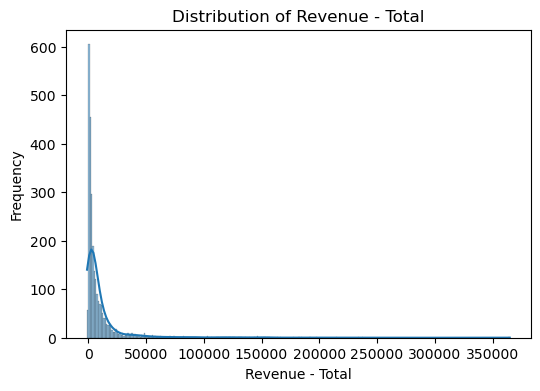

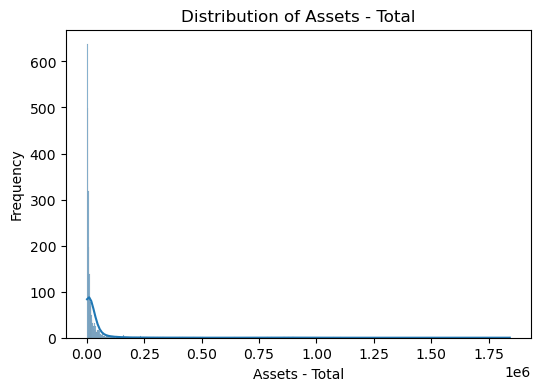

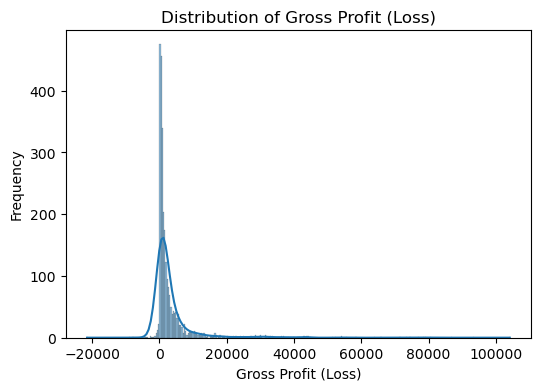

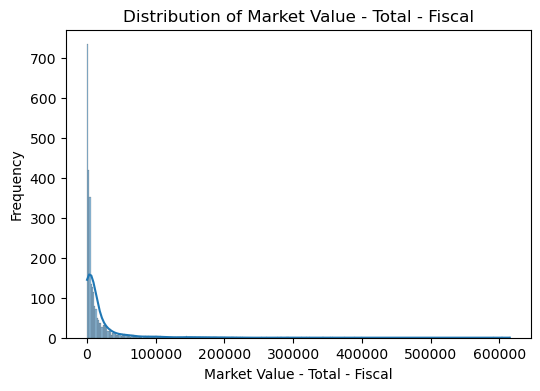

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

univariate_cols = [
    "Revenue - Total",
    "Assets - Total",
    "Gross Profit (Loss)",
    "Market Value - Total - Fiscal"
]

for col in univariate_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## Boxplots (Outlier Detection – Univariate)

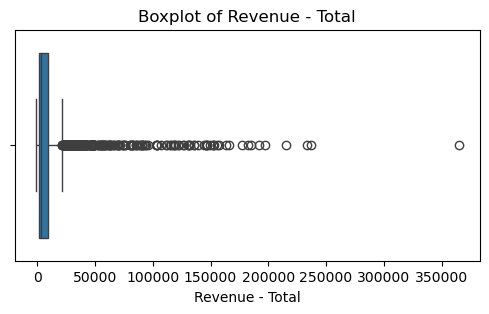

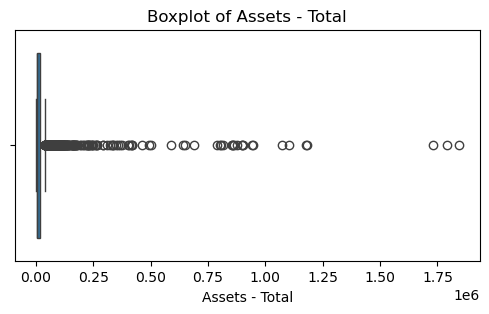

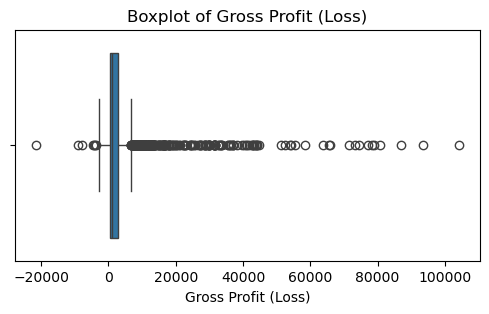

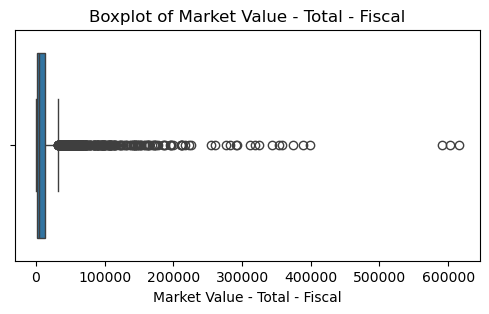

In [14]:
for col in univariate_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

### Outlier Treatment 

In [15]:
def cap_outliers_iqr(df, col, factor=1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - factor * IQR
    upper = Q3 + factor * IQR

    df[col] = np.where(df[col] > upper, upper,np.where(df[col] < lower, lower, df[col]))

    return df

In [16]:
cap_columns = ["Revenue - Total","Assets - Total","Market Value - Total - Fiscal","Total debt/total asset"]

for col in cap_columns:
    df = cap_outliers_iqr(df, col)

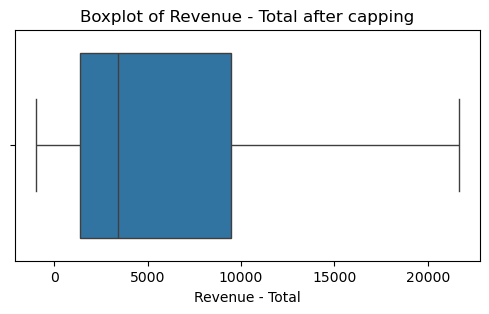

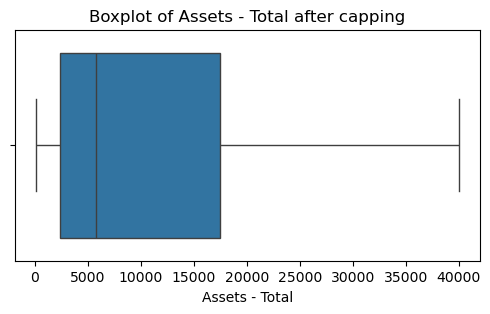

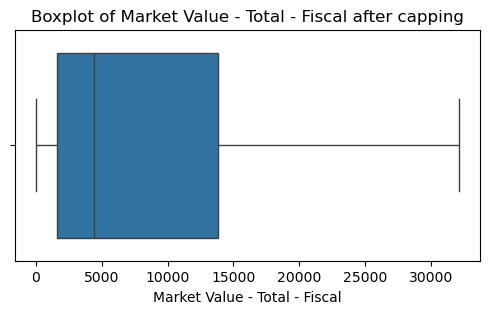

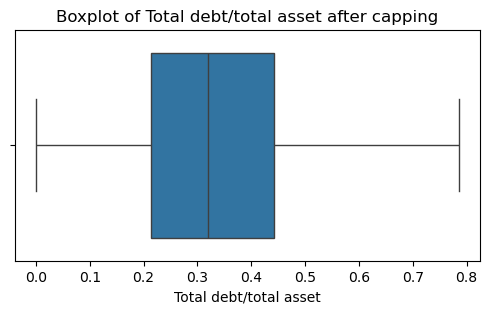

In [17]:
for col in cap_columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col} after capping")
    plt.show()

Several financial variables exhibited extreme right skewness and influential outliers, particularly revenue, assets, market value, and leverage ratios. Rather than removing observations, IQR-based capping was applied to reduce the influence of extreme values while preserving firm-level information.

### Skewness Check

In [18]:
from scipy.stats import skew

skew_values = df[cap_columns].apply(skew)
skew_values

Revenue - Total                  1.205320
Assets - Total                   1.201022
Market Value - Total - Fiscal    1.171756
Total debt/total asset           0.583296
dtype: float64

In [19]:
## LINEAR REGRESSION DATA (LOG TRANSFORM ONLY PREDICTORS)

In [20]:
df_lr = df.copy()


log_cols = [
    "Assets - Total",
    "Market Value - Total - Fiscal"
]

for col in log_cols:
    df_lr[col] = np.log1p(df_lr[col])

# Optional: check skewness after transformation
df_lr[log_cols].apply(skew)

Assets - Total                  -0.118231
Market Value - Total - Fiscal   -0.494516
dtype: float64

In [21]:
## Apply log1p to selected skewed columns

In [22]:
# Recreate df_lr cleanly
df_lr = df.copy()

# Log-transform ONLY predictors (not target)
log_cols = [
    "Assets - Total",
    "Market Value - Total - Fiscal"
]

for col in log_cols:
    df_lr[col] = np.log1p(df_lr[col])

In [23]:
from scipy.stats import skew
df_lr[log_cols].apply(skew)

Assets - Total                  -0.118231
Market Value - Total - Fiscal   -0.494516
dtype: float64

## MULTIVARIATE ANALYSIS

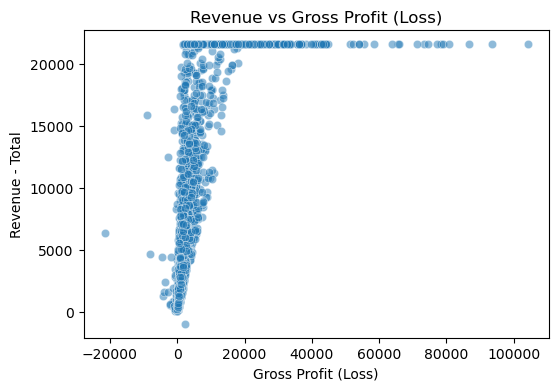

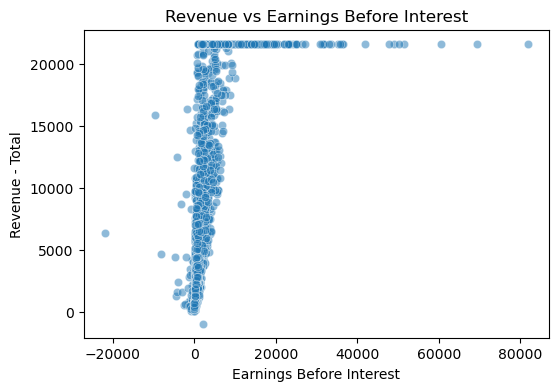

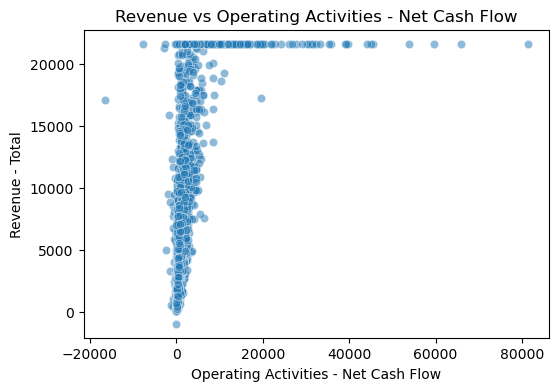

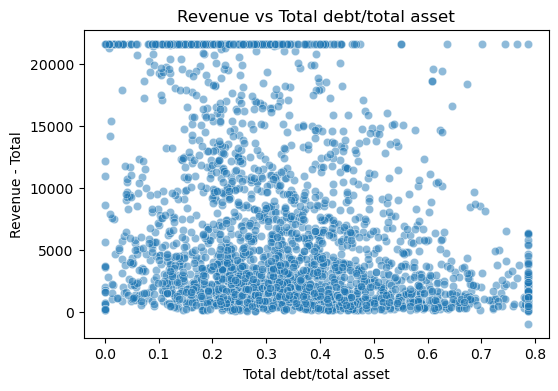

In [24]:
multivariate_cols = [
    "Gross Profit (Loss)",
    "Earnings Before Interest",
    "Operating Activities - Net Cash Flow",
    "Total debt/total asset"
]

for col in multivariate_cols:
    plt.figure(figsize=(6,4))
    sns.scatterplot(
        x=df[col],
        y=df["Revenue - Total"],
        alpha=0.5
    )
    plt.title(f"Revenue vs {col}")
    plt.xlabel(col)
    plt.ylabel("Revenue - Total")
    plt.show()

## (Advanced Multivariate) Feature Importance

## Correlation Heatmap (Core Multivariate Step)

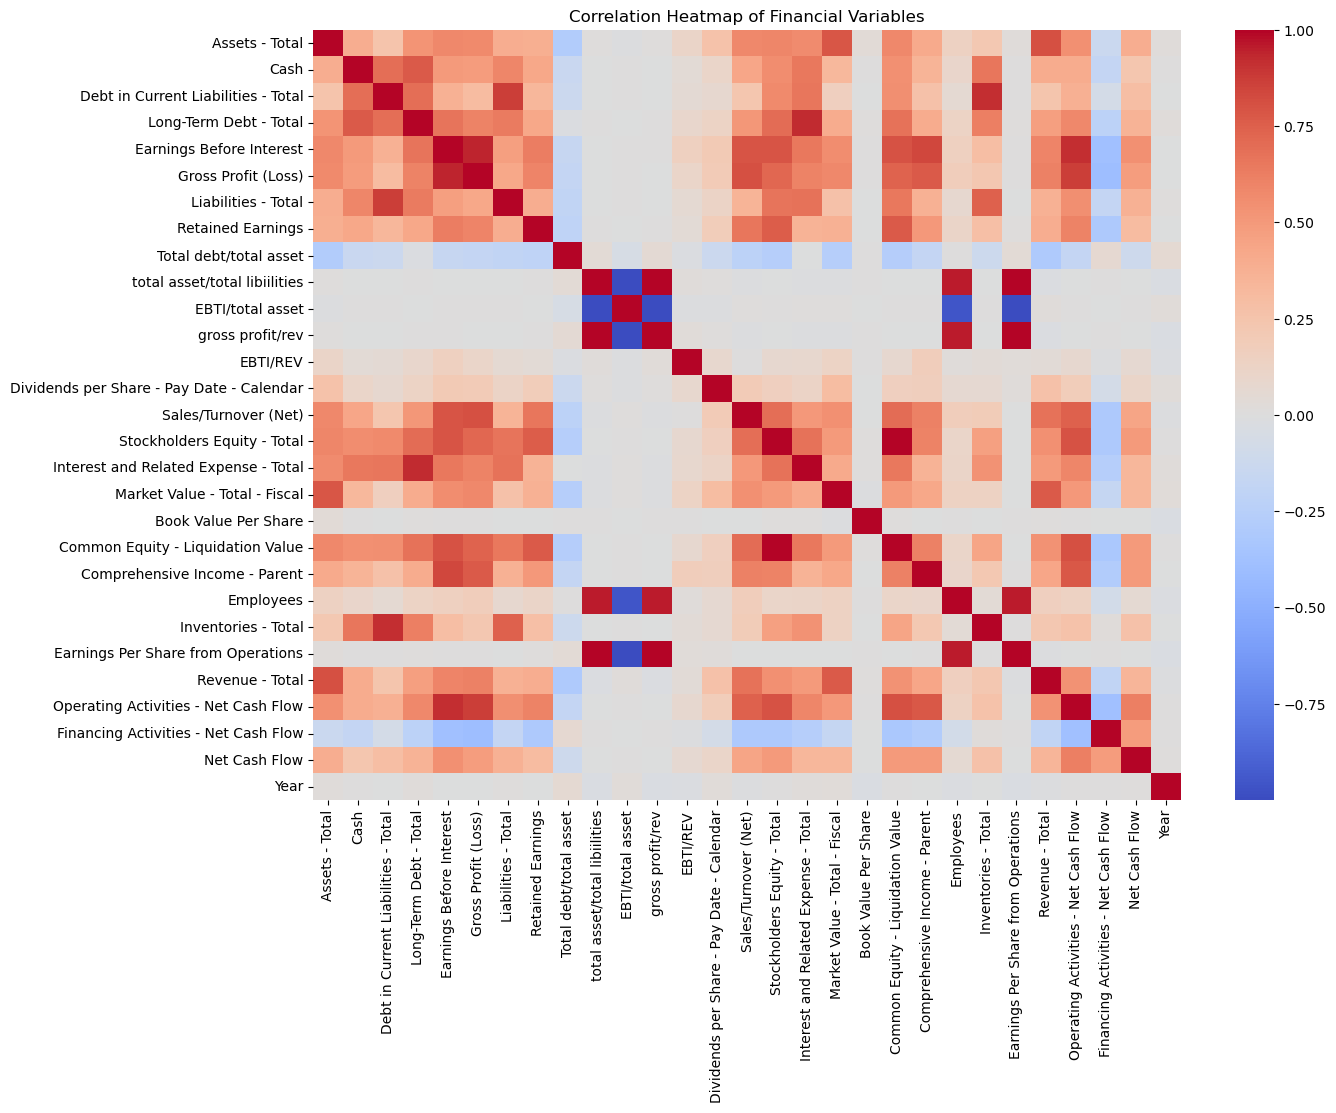

In [25]:
plt.figure(figsize=(14,10))

corr = df.drop(columns=["Company_ID"]).corr()

sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0
)

plt.title("Correlation Heatmap of Financial Variables")
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# Create feature importance series
feature_importance = pd.Series(xgb.feature_importances_,
                               index=X_train_xgb.columns).sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(8,6))
feature_importance.head(10).plot(kind="barh")
plt.title("Top 10 Features Influencing Revenue (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

## PCA Code 

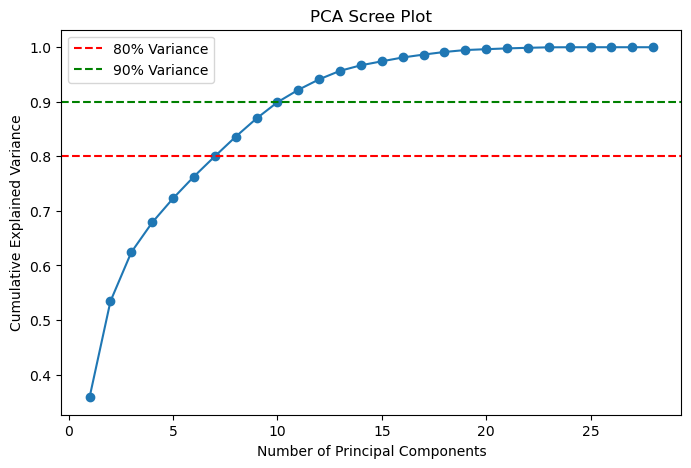

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_features = df.drop(columns=[
    "Revenue - Total",
    "Company_ID"
])

scaler = StandardScaler()
pca_scaled = scaler.fit_transform(pca_features)

pca = PCA()
pca.fit(pca_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1),
         cumulative_variance,
         marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Scree Plot")
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Variance')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% Variance')
plt.legend()
plt.show()

In [28]:
pca_df = pd.DataFrame({
    "Principal Component": np.arange(1, len(explained_variance)+1),
    "Explained Variance Ratio": explained_variance,
    "Cumulative Variance": cumulative_variance
})

pca_df.head(10)

,Principal Component,Explained Variance Ratio,Cumulative Variance
0,1,0.358378,0.358378
1,2,0.175882,0.534260
2,3,0.089963,0.624223
3,4,0.054467,0.678690
4,5,0.044213,0.722902
5,6,0.040060,0.762962
6,7,0.037042,0.800004
7,8,0.036004,0.836008
8,9,0.033520,0.869528
9,10,0.029651,0.899180


### PCA-based Linear Regression (Comparison Model)

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


train = df[df["Year"] < 2016]
test  = df[df["Year"] == 2016]

drop_cols = ["Revenue - Total", "Sales/Turnover (Net)", "Company_ID"]

X_train = train.drop(columns=drop_cols)
y_train = train["Revenue - Total"]

X_test = test.drop(columns=drop_cols)
y_test = test["Revenue - Total"]

### STANDARDIZE FEATURES (MANDATORY FOR PCA)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### APPLY PCA (KEEP ~90% VARIANCE)

In [31]:
pca = PCA(n_components=0.90)  # retain 90% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Number of PCA components:", X_train_pca.shape[1])

Number of PCA components: 10


### TRAIN LINEAR REGRESSION ON PCA COMPONENTS

In [32]:
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_lr_pca = lr_pca.predict(X_test_pca)

print("PCA-based Linear Regression Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr_pca)))
print("MAE :", mean_absolute_error(y_test, y_pred_lr_pca))
print("R²  :", r2_score(y_test, y_pred_lr_pca))

PCA-based Linear Regression Results
RMSE: 3772.9976211126327
MAE : 2673.688763729945
R²  : 0.6939407518990501


## LINEAR REGRESSION DATA (LOG TRANSFORM ONLY PREDICTORS)

In [33]:
df_lr = df.copy()


log_cols = [
    "Assets - Total",
    "Market Value - Total - Fiscal"
]

for col in log_cols:
    df_lr[col] = np.log1p(df_lr[col])

# Optional: check skewness after transformation
df_lr[log_cols].apply(skew)

Assets - Total                  -0.118231
Market Value - Total - Fiscal   -0.494516
dtype: float64

## LINEAR REGRESSION DATA (LOG TRANSFORM ONLY PREDICTORS)

In [34]:
# Recreate df_lr cleanly
df_lr = df.copy()

# Log-transform ONLY predictors (not target)
log_cols = [
    "Assets - Total",
    "Market Value - Total - Fiscal"
]

for col in log_cols:
    df_lr[col] = np.log1p(df_lr[col])

In [35]:
from scipy.stats import skew
df_lr[log_cols].apply(skew)

Assets - Total                  -0.118231
Market Value - Total - Fiscal   -0.494516
dtype: float64

# LINEAR REGRESSION (BASELINE)

In [36]:
train_lr = df_lr[df_lr["Year"] < 2016]
test_lr  = df_lr[df_lr["Year"] == 2016]

X_train_lr = train_lr.drop(columns=["Revenue - Total", "Company_ID"])
y_train_lr = train_lr["Revenue - Total"]

X_test_lr = test_lr.drop(columns=["Revenue - Total", "Company_ID"])
y_test_lr = test_lr["Revenue - Total"]

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train_lr, y_train_lr)

y_pred_lr = lr.predict(X_test_lr)

print("Linear Regression Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test_lr, y_pred_lr)))
print("MAE :", mean_absolute_error(y_test_lr, y_pred_lr))
print("R²  :", r2_score(y_test_lr, y_pred_lr))

Linear Regression Results
RMSE: 3396.4866539028694
MAE : 2537.325787061977
R²  : 0.7519768213627323


## COMPARISON: NORMAL LR vs PCA-LR

In [38]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "PCA-based Linear Regression"],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_lr_pca))
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_lr),
        mean_absolute_error(y_test, y_pred_lr_pca)
    ],
    "R²": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_lr_pca)
    ]
})

comparison

,Model,RMSE,MAE,R²
0,Linear Regression,3396.486654,2537.325787,0.751977
1,PCA-based Linear Regression,3772.997621,2673.688764,0.693941


## RANDOM FOREST REGRESSOR (MAIN MODEL)

In [39]:
train_rf = df[df["Year"] < 2016]
test_rf  = df[df["Year"] == 2016]

leakage_cols = ["Revenue - Total","Sales/Turnover (Net)", "Company_ID"]

X_train_rf = train_rf.drop(columns=leakage_cols)
y_train_rf = train_rf["Revenue - Total"]

X_test_rf = test_rf.drop(columns=leakage_cols)
y_test_rf = test_rf["Revenue - Total"]

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_rf)

In [41]:
y_pred_rf = rf.predict(X_test_rf)

print("Random Forest Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))
print("MAE :", mean_absolute_error(y_test_rf, y_pred_rf))
print("R²  :", r2_score(y_test_rf, y_pred_rf))

Random Forest Results
RMSE: 741.8848782599861
MAE : 364.8041515032268
R²  : 0.9881667107008562


In [42]:
leakage_cols = ["Revenue - Total","Sales/Turnover (Net)", "Company_ID"]


X_train_rf = train_rf.drop(columns=leakage_cols)
y_train_rf = train_rf["Revenue - Total"]

X_test_rf = test_rf.drop(columns=leakage_cols)
y_test_rf = test_rf["Revenue - Total"]


rf = RandomForestRegressor(n_estimators=300,max_depth=10,min_samples_leaf=5,
    random_state=42,n_jobs=-1)

rf.fit(X_train_rf, y_train_rf)

y_pred_rf = rf.predict(X_test_rf)

print("Random Forest (No Leakage) Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)))
print("MAE :", mean_absolute_error(y_test_rf, y_pred_rf))
print("R²  :", r2_score(y_test_rf, y_pred_rf))

Random Forest (No Leakage) Results
RMSE: 741.8848782599862
MAE : 364.8041515032268
R²  : 0.9881667107008562


# XGBOOST REGRESSOR 

In [43]:
from xgboost import XGBRegressor

# Use same features as RF
X_train_xgb = X_train_rf.copy()
y_train_xgb = y_train_rf.copy()

X_test_xgb = X_test_rf.copy()
y_test_xgb = y_test_rf.copy()


In [44]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_xgb, y_train_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=-1, num_parallel_tree=None, ...)

In [45]:
y_pred_xgb = xgb.predict(X_test_xgb)

print("XGBoost Results")
print("RMSE:", np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb)))
print("MAE :", mean_absolute_error(y_test_xgb, y_pred_xgb))
print("R²  :", r2_score(y_test_xgb, y_pred_xgb))

XGBoost Results
RMSE: 515.374202262984
MAE : 270.0109462825595
R²  : 0.994289451881284


In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression",
        "Random Forest",
        "XGBoost"
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test_lr, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test_rf, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test_xgb, y_pred_xgb))
    ],
    "MAE": [
        mean_absolute_error(y_test_lr, y_pred_lr),
        mean_absolute_error(y_test_rf, y_pred_rf),
        mean_absolute_error(y_test_xgb, y_pred_xgb)
    ],
    "R²": [
        r2_score(y_test_lr, y_pred_lr),
        r2_score(y_test_rf, y_pred_rf),
        r2_score(y_test_xgb, y_pred_xgb)
    ]
})

comparison_df

,Model,RMSE,MAE,R²
0,Linear Regression,3396.486654,2537.325787,0.751977
1,Random Forest,741.884878,364.804152,0.988167
2,XGBoost,515.374202,270.010946,0.994289


In [47]:
comparison_df.sort_values(by="R²", ascending=False)

,Model,RMSE,MAE,R²
2,XGBoost,515.374202,270.010946,0.994289
1,Random Forest,741.884878,364.804152,0.988167
0,Linear Regression,3396.486654,2537.325787,0.751977


## FEATURE IMPORTANCE

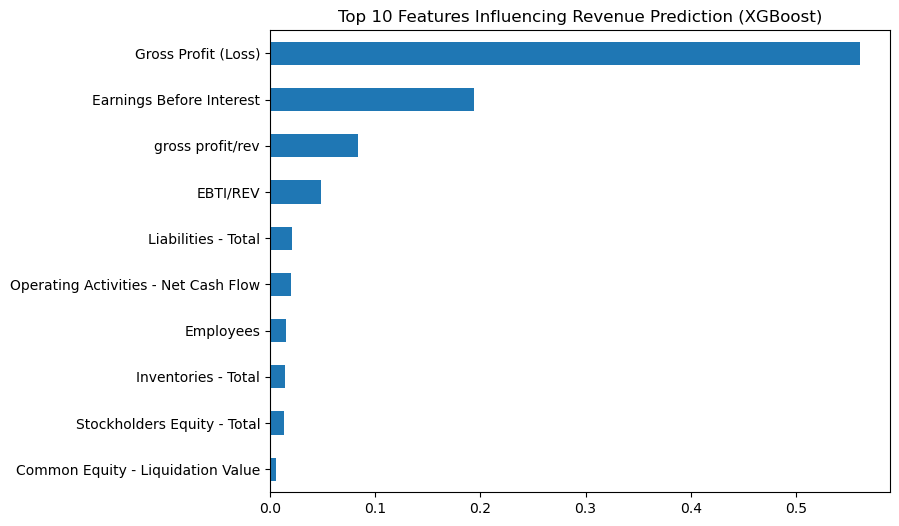

Gross Profit (Loss)                     0.561046
Earnings Before Interest                0.194440
gross profit/rev                        0.083483
EBTI/REV                                0.048614
Liabilities - Total                     0.021029
Operating Activities - Net Cash Flow    0.020430
Employees                               0.015236
Inventories - Total                     0.014486
Stockholders Equity - Total             0.013517
Common Equity - Liquidation Value       0.005827
dtype: float32

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.Series(
    xgb.feature_importances_,
    index=X_train_xgb.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importance.head(10).plot(kind="barh")
plt.title("Top 10 Features Influencing Revenue Prediction (XGBoost)")
plt.gca().invert_yaxis()
plt.show()

importance.head(10)

## Linear Regression (Actual vs Predicted)

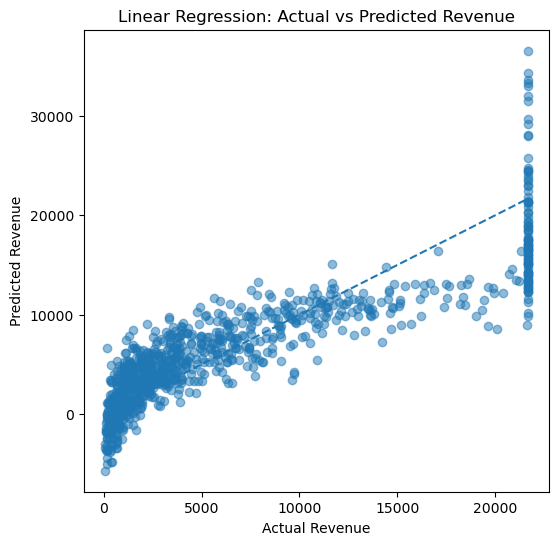

In [49]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.5)
plt.plot([y_test_lr.min(), y_test_lr.max()],[y_test_lr.min(), y_test_lr.max()],linestyle="--")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Linear Regression: Actual vs Predicted Revenue")
plt.show()

## Random Forest (Actual vs Predicted)

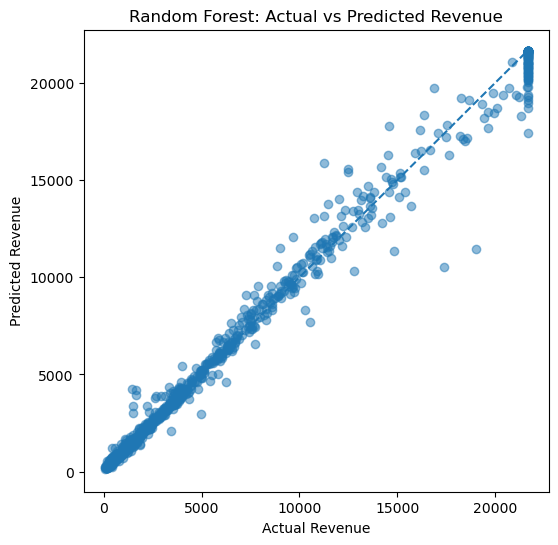

In [50]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.5)
plt.plot([y_test_rf.min(), y_test_rf.max()],[y_test_rf.min(), y_test_rf.max()],linestyle="--")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Random Forest: Actual vs Predicted Revenue")
plt.show()

## XGBoost (Actual vs Predicted)

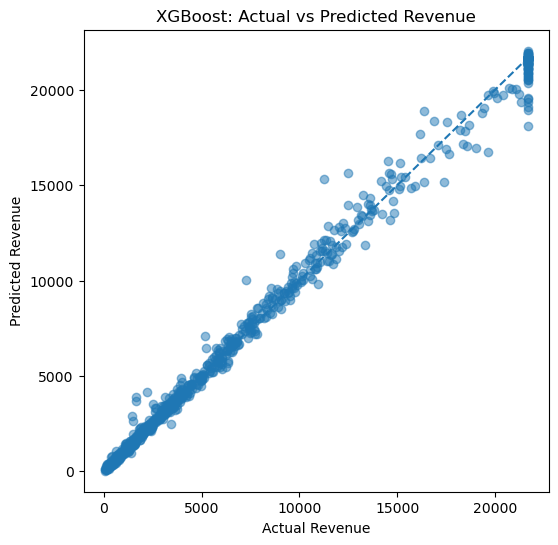

In [51]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_xgb, y_pred_xgb, alpha=0.5)
plt.plot([y_test_xgb.min(), y_test_xgb.max()],[y_test_xgb.min(), y_test_xgb.max()],linestyle="--")
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("XGBoost: Actual vs Predicted Revenue")
plt.show()

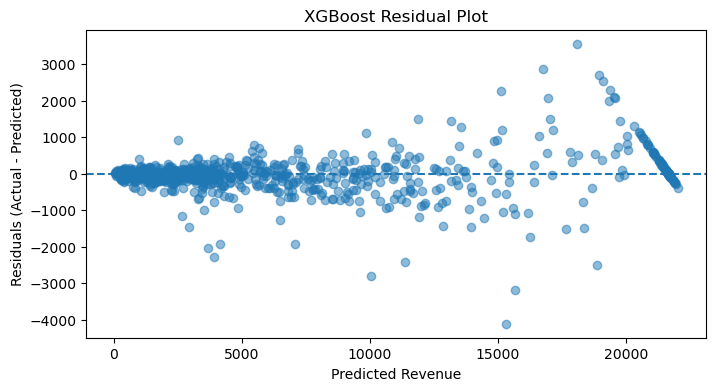

In [52]:
residuals_xgb = y_test_xgb - y_pred_xgb

plt.figure(figsize=(8,4))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("XGBoost Residual Plot")
plt.show()

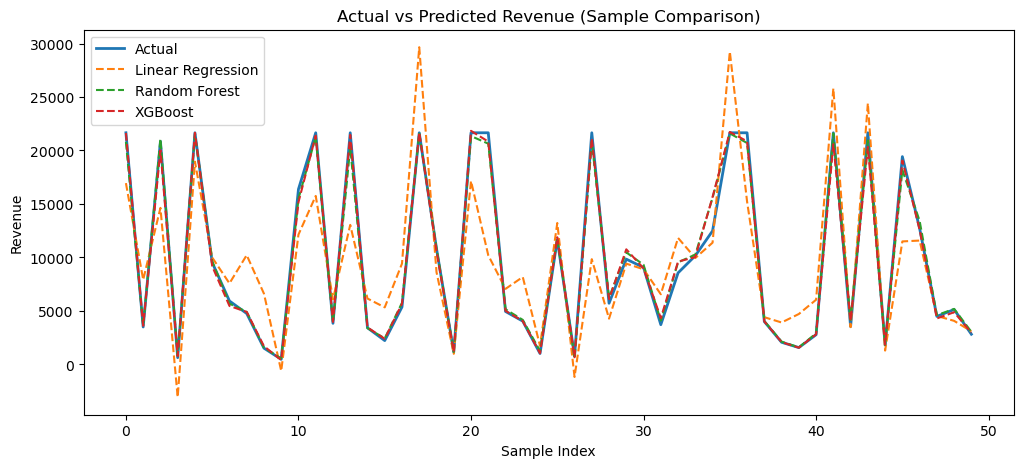

In [53]:
sample_size = 50

plt.figure(figsize=(12,5))
plt.plot(y_test_xgb.values[:sample_size], label="Actual", linewidth=2)
plt.plot(y_pred_lr[:sample_size], label="Linear Regression", linestyle="--")
plt.plot(y_pred_rf[:sample_size], label="Random Forest", linestyle="--")
plt.plot(y_pred_xgb[:sample_size], label="XGBoost", linestyle="--")
plt.legend()
plt.title("Actual vs Predicted Revenue (Sample Comparison)")
plt.xlabel("Sample Index")
plt.ylabel("Revenue")
plt.show()

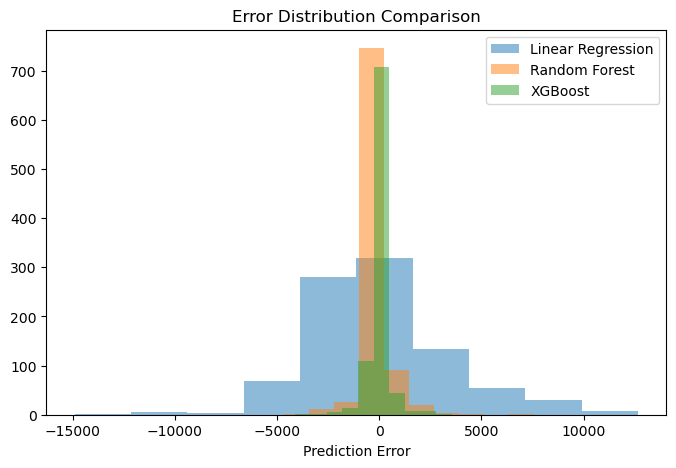

In [54]:
plt.figure(figsize=(8,5))
plt.hist(y_test_lr - y_pred_lr, alpha=0.5, label="Linear Regression")
plt.hist(y_test_rf - y_pred_rf, alpha=0.5, label="Random Forest")
plt.hist(y_test_xgb - y_pred_xgb, alpha=0.5, label="XGBoost")
plt.legend()
plt.title("Error Distribution Comparison")
plt.xlabel("Prediction Error")
plt.show()

The actual versus predicted plots demonstrate that ensemble models significantly outperform linear regression. The XGBoost model shows predictions tightly aligned along the diagonal, indicating high accuracy. Residual analysis confirms the absence of systematic bias, while sample-level comparisons illustrate the superior tracking capability of XGBoost.

### Plot Residuals — Linear Regression vs XGBoost

In [55]:
residuals_lr  = y_test_lr - y_pred_lr
residuals_xgb = y_test_xgb - y_pred_xgb

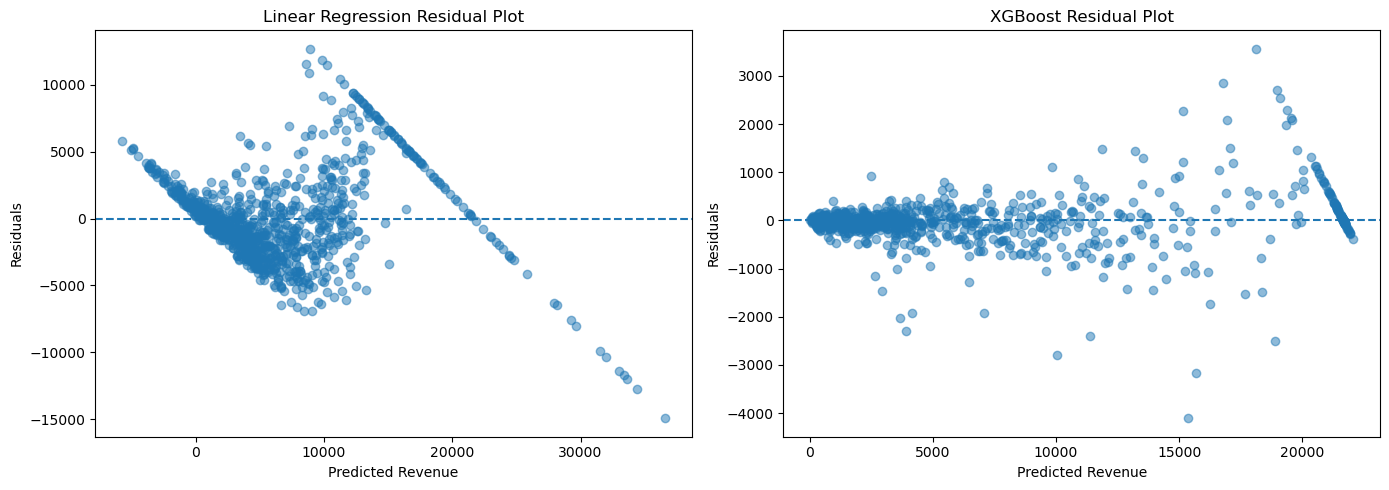

In [56]:
plt.figure(figsize=(14,5))

# Linear Regression residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred_lr, residuals_lr, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("Linear Regression Residual Plot")

# XGBoost residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicted Revenue")
plt.ylabel("Residuals")
plt.title("XGBoost Residual Plot")

plt.tight_layout()
plt.show()

The XGBoost residual plot shows randomly distributed residuals around zero, indicating a well-fitted model with no systematic bias.

In [57]:
import joblib


joblib.dump(xgb, 'revenue_model.pkl')


model_features = X_train.columns.tolist()
joblib.dump(model_features, 'model_features.pkl')

print("Model and features saved successfully!")

Model and features saved successfully!
